# Titanic - Exploratory Data Analysis - 06

## Introduction

The purpose of this analysis is to predict if a passenger survived the Titanic disaster.

On April 15, 1912, ran into an iceberg killing 1,502 of 2,224 passengers and crew.

Of these people aboard the Titanic, we are provided with data on 1,309 passengers -- 891 in the training set and 418 in the test set.

Here are some questions we should try to answer during our analysis that could help us understand what a predictive model could look like:
 * What was the survival rate of women versus men?
 * What was the survival rate of children versus adults?
 * Did passenger socio-economic status play a role in survival?
 * How does age affect a passengers survival?
    * What if age is compounded with sex?
    * Or with class?

### Data Dictionary

  * Categorical
    * Sex: Sex of passenger
        * male
        * female 
    * Ticket: Ticket number of passenger
    * Cabin: Room where passenger stayed
        * Compound field where first alpha character designated the section of the ship and the following numbers was the room number
        * Essentially, it's the location of a passenger's room on the ship
    * Embarked: Port of Embarkation
        * C = Cherbourg
        * Q = Queenstown
        * S = Southampton
  * Numerical
    * Survival: Integer boolean indicating if passenger survived - target variable
        * 0 = No
        * 1 = Yes
    * PassengerId : Unique integer value corresponding to each passenger
    * Pclass: Ticket class - proxy for socio-economic status
        * 1 = 1st (upper)
        * 2 = 2nd (middle)
        * 3 = 3rd (lower)
    * Age: Age in years - fractional if less than 1
        * If the age is estimated, it is in the form of xx.5
    * SibSp: \# of siblings / spouses aboard the Titanic
        * Sibling = brother, sister, stepbrother, stepsister
        * Spouse = husband, wife (mistresses and fiances were ignored)
    * Parch: \# of parents / children aboard the Titanic
        * Parent = mother, father
        * Child = daughter, son, stepdaughter, stepson
        * Some children travelled only with a nanny, therefore Parch=0 for them
    * Fare: Passenger fare

In [1]:
# Import libraries
import os
import sys

import scipy
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
import seaborn as sns
import missingno as msno

import warnings

if os.getcwd() not in sys.path:
    sys.path.append(os.getcwd())
from Titanic.Code.DataPrep.helpers import *

warnings.filterwarnings('ignore')
np.random.seed(17)
%matplotlib inline

## 1. Read and summarize the data

In [2]:
df_train = Titanic(name='train').data

In [3]:
df_train.head()

,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
PassengerId,,,,,,,,,,,
1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [4]:
df_train.tail()

,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
PassengerId,,,,,,,,,,,
887,0,2,"Montvila, Rev. Juozas",male,27.0,0,0,211536,13.00,NaN,S
888,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.00,B42,S
889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,NaN,1,2,W./C. 6607,23.45,NaN,S
890,1,1,"Behr, Mr. Karl Howell",male,26.0,0,0,111369,30.00,C148,C
891,0,3,"Dooley, Mr. Patrick",male,32.0,0,0,370376,7.75,NaN,Q


In [5]:
df_train.sample(10)

,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
PassengerId,,,,,,,,,,,
891,0,3,"Dooley, Mr. Patrick",male,32.0,0,0,370376,7.7500,NaN,Q
499,0,1,"Allison, Mrs. Hudson J C (Bessie Waldo Daniels)",female,25.0,1,2,113781,151.5500,C22 C26,S
665,1,3,"Lindqvist, Mr. Eino William",male,20.0,1,0,STON/O 2. 3101285,7.9250,NaN,S
262,1,3,"Asplund, Master. Edvin Rojj Felix",male,3.0,4,2,347077,31.3875,NaN,S
717,1,1,"Endres, Miss. Caroline Louise",female,38.0,0,0,PC 17757,227.5250,C45,C
49,0,3,"Samaan, Mr. Youssef",male,NaN,2,0,2662,21.6792,NaN,C
393,0,3,"Gustafsson, Mr. Johan Birger",male,28.0,2,0,3101277,7.9250,NaN,S
362,0,2,"del Carlo, Mr. Sebastiano",male,29.0,1,0,SC/PARIS 2167,27.7208,NaN,C
496,0,3,"Yousseff, Mr. Gerious",male,NaN,0,0,2627,14.4583,NaN,C


#### Initial observations
 * The column 'Cabin' and 'Age' have missing values.
 * The 'Name' column also includes the title of a passenger.
    * New question: Is there a pattern of survival rate for a given or group of titles?
 * A ticket does not seem to have any pattern or hidden features.
    * It is likely we will not use this for our current or final analysis.
    * Recommendation is to remove from dataset in future pipeline.

In [6]:
print("There are %d rows and %d columns in the dataset.\n" % df_train.shape)
print("The columns of the dataset are: %s\n" % ', '.join(df_train.columns))
df_train.dtypes

There are 891 rows and 11 columns in the dataset.

The columns of the dataset are: Survived, Pclass, Name, Sex, Age, SibSp, Parch, Ticket, Fare, Cabin, Embarked



Survived       int32
Pclass         int32
Name          object
Sex         category
Age          float64
SibSp          int32
Parch          int32
Ticket        object
Fare         float64
Cabin         object
Embarked    category
dtype: object

## 2. Identify data cleanup needed, action taken, and explanation.
 * Duplicate records
 * Unnecessary columns
 * Missing data
 * Data format

### 2.1 Duplicate records

In [7]:
print("There are %d duplicate records." % df_train.duplicated().sum())

There are 0 duplicate records.


### 2.2 Unnecessary columns

As stated above, there is no discernable pattern between values of 'Ticket'. Granted a deep analysis may be warranted, but on the outset it doesn't appear to have any value in determining the survival of a given passenger. Therefore, we will drop the 'Ticket' column.

In [8]:
df_train = df_train.drop(['Ticket'], axis=1)
df_train.head()

,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Fare,Cabin,Embarked
PassengerId,,,,,,,,,,
1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,7.2500,NaN,S
2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,71.2833,C85,C
3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,7.9250,NaN,S
4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,53.1000,C123,S
5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,8.0500,NaN,S


### 2.3 Missing data

In [9]:
# Ratio of missing data
round(df_train.isnull().sum()/len(df_train)*100, 2)

Survived     0.00
Pclass       0.00
Name         0.00
Sex          0.00
Age         19.87
SibSp        0.00
Parch        0.00
Fare         0.00
Cabin       77.10
Embarked     0.22
dtype: float64

In [10]:
# Count of missing data
df_train.isnull().sum()

Survived      0
Pclass        0
Name          0
Sex           0
Age         177
SibSp         0
Parch         0
Fare          0
Cabin       687
Embarked      2
dtype: int64

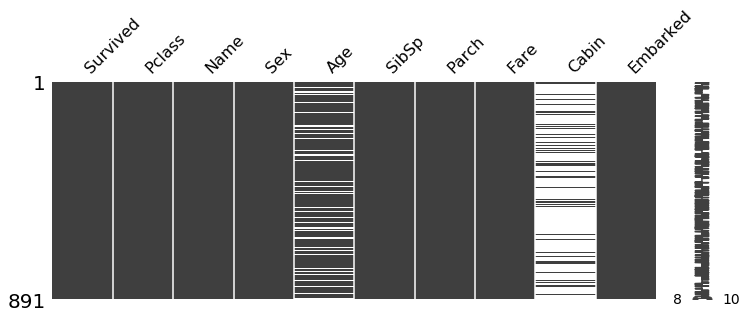

In [11]:
# Plot of missing data
msno.matrix(df_train, figsize=(12, 4))

For each of 'Age', 'Cabin', and 'Embarked', which are MCAR, MAR, or MNAR?
 * MCAR - Missing Completely at Random
    * When the probability of missing data on a variable is unrelated to any other measured variable and is unrelated to the variable with missing values itself.
         * Little's MCAR Test (abbreviated)
            1. Calculate the mean of each column with missing data.
            2. Calculate the mean of each column without missing data.
            3. If a majority of the columns have same/similar means, then it is LIKELY the data is MCAR.
         * We will perform a t-test on mean survival ('Survived') before and after removing the records with missing values.
 * MAR - Missing at Random
    * When the probability of missing data on a variable is related to some other measured variable in the model, but notto the value of the variable with missing values itself.
         * For example, when data are missing on IQ for a given threshold of age (i.e. children don't have an IQ score in the survey).
 * MNAR - Missing not at Random
    * When the missing values on a variable are related to the values of that variable itself, even after controlling for other variables.
         * For example, when data are missing on IQ and only the people with low IQ values have missing observations for this variable.

In [12]:
# Import t-test function
from scipy.stats import ttest_ind

average_survival = df_train['Survived'].mean()
missing_columns = ['Age', 'Cabin', 'Embarked']
alpha = 0.05
for miss_col in missing_columns:
    print(miss_col)
    tmp_mean_without = df_train.loc[
        ~df_train[miss_col].isnull()
    ]['Survived'].mean()
    print("\tAverage survival with missing: %.5f" % average_survival)
    print("\tAverage survival without missing: %.5f" % tmp_mean_without)
    t_stat, p_value = ttest_ind(
        a=df_train['Survived'],
        b=df_train.loc[~df_train[miss_col].isnull()]['Survived']
    )
    print('\tt-statistic: %.5f; p-value: %.5f' % (t_stat, p_value))
    
    if p_value > alpha:
        print(
            "\tFail to reject null hypothesis of equal means,\n" \
            "\ttherefore assume equal means across samples.\n"
        )
    else:
        print(
            "\tReject null hypothesis of equal means,\n" \
            "\ttherefore assume different means across samples.\n"
        )

Age
	Average survival with missing: 0.38384
	Average survival without missing: 0.40616
	t-statistic: -0.90934; p-value: 0.36331
	Fail to reject null hypothesis of equal means,
	therefore assume equal means across samples.

Cabin
	Average survival with missing: 0.38384
	Average survival without missing: 0.66667
	t-statistic: -7.52850; p-value: 0.00000
	Reject null hypothesis of equal means,
	therefore assume different means across samples.

Embarked
	Average survival with missing: 0.38384
	Average survival without missing: 0.38245
	t-statistic: 0.06012; p-value: 0.95207
	Fail to reject null hypothesis of equal means,
	therefore assume equal means across samples.



We will move forward with our analysis under the assumption that 'Age' and 'Embarked' are both MCAR. Therefore, we can be relatively confident that we can use some sort of imputation strategy for these columns.

However, further analysis will be required to determine the type of missingness exhibited by 'Cabin'. For now, let's just drop it since it has an overwhelming number of missing values and any kind of imputation just doesn't seem feasible.

Due to the overwhelming number of missing data present in the 'Cabin' feature, we will make a note to drop it later in our analysis.

In [13]:
df_train = df_train.drop(['Cabin'], axis=1)
df_train.head()

,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Fare,Embarked
PassengerId,,,,,,,,,
1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,7.2500,S
2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,71.2833,C
3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,7.9250,S
4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,53.1000,S
5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,8.0500,S


Let's now explore how we can impute values for 'Age'.

Some Python libraries that we could use are:
 * [statsmodels.imputation](https://www.statsmodels.org/devel/api.html#imputation)
 * [sklearn.impute](https://scikit-learn.org/stable/modules/classes.html#module-sklearn.impute)
 * [fancyimpute](https://github.com/iskandr/fancyimpute)
    * [IterativeImputer](https://scikit-learn.org/stable/modules/generated/sklearn.impute.IterativeImputer.html#sklearn-impute-iterativeimputer) == MICE
 * [autoimpute](https://github.com/kearnz/autoimpute)
 * [impyute](https://github.com/eltonlaw/impyute)
 * [datawig](https://github.com/awslabs/datawig)

Relevant forum discussion links:
 * [advice-on-imputing-temperature-data-with-statsmodels-mice](https://datascience.stackexchange.com/questions/52927/advice-on-imputing-temperature-data-with-statsmodels-mice)
 * [how-to-know-which-imputation-is-best-for-impute-my-dataset-from-multiple-imputat](https://stats.stackexchange.com/questions/188288/how-to-know-which-imputation-is-best-for-impute-my-dataset-from-multiple-imputat)

Informational links on topic:
 * [Imputation and Feature Selection](https://amueller.github.io/COMS4995-s18/slides/aml-08-021218-imputation-feature-selection)
 * [Python MICE + XGBoost + Regularized Linear Models](https://www.kaggle.com/mizioan/python-mice-xgboost-regularized-linear-models)
 * [Dealing With Missing Data In Python](https://s3.amazonaws.com/assets.datacamp.com/production/course_17404/slides/chapter4.pdf)
 * [Handling Missing Values in Machine Learning: Part 1](https://archive.is/6Izzd)
 * [Handling Missing Values in Machine Learning: Part 2](http://archive.is/zY1dd)
 * [Imputing missing values with variants of IterativeImputer](https://scikit-learn.org/stable/auto_examples/impute/plot_iterative_imputer_variants_comparison.html#sphx-glr-auto-examples-impute-plot-iterative-imputer-variants-comparison-py)

In [16]:
# Import libraries for imputing
from sklearn.experimental import enable_iterative_imputer
from sklearn.impute import IterativeImputer
from sklearn.impute import SimpleImputer
from sklearn.linear_model import BayesianRidge
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import ExtraTreesRegressor
from sklearn.neighbors import KNeighborsRegressor
from sklearn.pipeline import make_pipeline
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import KFold


def score_impute_strategies(
    data, imp_target:str, columns: list, estimators: list, scorer: str, 
    n_splits: int=5, max_iter: int=10, simple_strats: list=['mean', 'median'], groups=None):

    n_samples, n_features = data[columns].shape

    X_full = data.loc[data[imp_target].notnull()][columns].iloc[:, 1:]
    y_full = data.loc[data[imp_target].notnull()][columns].iloc[:, 0]

    # Estimate the score on the entire dataset, with no missing values
    base_est = estimators[0]
    score_full_data = pd.DataFrame(
        cross_val_score(
            base_est, X_full, y_full, scoring=scorer,
            cv=KFold(n_splits, shuffle=True), groups=groups
        ),
        columns=['Full Data']
    )

    # Create copy of entire dataset with missing values
    X_missing = data[columns].iloc[:, 1:]
    y_missing = data[columns].iloc[:, 0]

    # Estimate the score after imputation (mean and median strategies)
    score_simple_imputer = pd.DataFrame()
    for strategy in list(simple_strats):
        estimator = make_pipeline(
            SimpleImputer(strategy=strategy),
            base_est
        )
        score_simple_imputer[strategy] = cross_val_score(
            estimator, X_missing, y_missing, scoring=scorer,
            cv=KFold(n_splits, shuffle=True), groups=groups
        )

    # Estimate the score after iterative imputation
    score_iterative_imputer = pd.DataFrame()
    for impute_estimator in estimators:
        estimator = make_pipeline(
            IterativeImputer(estimator=impute_estimator, max_iter=max_iter),
            base_est
        )
        score_iterative_imputer[impute_estimator.__class__.__name__] = \
            cross_val_score(
                estimator, X_missing, y_missing, scoring=scorer,
                cv=KFold(n_splits, shuffle=True), groups=groups
            )

    # Aggregate scores together from each method
    scores = pd.concat(
        [score_full_data, score_simple_imputer, score_iterative_imputer],
        keys=['Original', 'SimpleImputer', 'IterativeImputer'], axis=1
    )

    # Return results
    return scores

Before we start estimating imputed values and scoring them, we should encode our categorical variables.

In [21]:
from sklearn.preprocessing import LabelEncoder

# Make transformer object
lb_emb = LabelEncoder()

# Fit & transform 'Embarked' to integer
df_train['Embarked_Code'] = lb_emb.fit_transform(df_train['Embarked'].astype(str))

# Fit & transform 'Sex' to integer
df_train['Sex_Code'] = lb_emb.fit_transform(df_train['Sex'].astype(str))

# Review results
df_train[['Embarked', 'Embarked_Code', 'Sex', 'Sex_Code']].sample(10)

,Embarked,Embarked_Code,Sex,Sex_Code
PassengerId,,,,
752,S,2,male,1
448,S,2,male,1
160,S,2,male,1
618,S,2,female,0
509,S,2,male,1
546,S,2,male,1
275,Q,1,female,0
285,S,2,male,1
106,S,2,male,1


Next, we're going to extract the passenger's title from their name.

In [23]:
df_train['Title'] = df_train['Name'].str.split(", ", expand=True)[1].str.split(".", expand=True)[0]
df_train['Title'].value_counts()

Mr              517
Miss            182
Mrs             125
Master           40
Dr                7
Rev               6
Mlle              2
Col               2
Major             2
Sir               1
Lady              1
Mme               1
the Countess      1
Jonkheer          1
Don               1
Ms                1
Capt              1
Name: Title, dtype: int64

Now we can encode this new category to an integer value.

In [24]:
# Make transformer object
lb_emb = LabelEncoder()

# Fit & transform 'Embarked' to integer
df_train['Title_Code'] = lb_emb.fit_transform(df_train['Title'].astype(str))

# Review results
df_train[['Title', 'Title_Code']].sample(10)

,Title,Title_Code
PassengerId,,
20,Mrs,12
871,Mr,11
746,Capt,0
639,Mrs,12
78,Mr,11
334,Mr,11
47,Mr,11
305,Mr,11
360,Miss,8


Let's review a sample of values from our DataFrame.

In [27]:
df_train.sample(10)

,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Fare,Embarked,Embarked_Code,Sex_Code,Title,Title_Code
PassengerId,,,,,,,,,,,,,
628,1,1,"Longley, Miss. Gretchen Fiske",female,21.0,0,0,77.9583,S,2,0,Miss,8
403,0,3,"Jussila, Miss. Mari Aina",female,21.0,1,0,9.8250,S,2,0,Miss,8
736,0,3,"Williams, Mr. Leslie",male,28.5,0,0,16.1000,S,2,1,Mr,11
83,1,3,"McDermott, Miss. Brigdet Delia",female,NaN,0,0,7.7875,Q,1,0,Miss,8
889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,NaN,1,2,23.4500,S,2,0,Miss,8
390,1,2,"Lehmann, Miss. Bertha",female,17.0,0,0,12.0000,C,0,0,Miss,8
167,1,1,"Chibnall, Mrs. (Edith Martha Bowerman)",female,NaN,0,1,55.0000,S,2,0,Mrs,12
338,1,1,"Burns, Miss. Elizabeth Margaret",female,41.0,0,0,134.5000,C,0,0,Miss,8
650,1,3,"Stanley, Miss. Amy Zillah Elsie",female,23.0,0,0,7.5500,S,2,0,Miss,8


In [30]:
columns = df_train.select_dtypes('number').columns.tolist()
scorers = ['r2', 'neg_mean_squared_error', 'neg_mean_absolute_error']
simple_strats = ['mean', 'median']
estimators = [
    BayesianRidge(), DecisionTreeRegressor(max_features='sqrt'), 
    ExtraTreesRegressor(n_estimators=10), KNeighborsRegressor(n_neighbors=15)
]

for scorer in scorers:
    try:
        results = score_impute_strategies(
            data=df_train,
            imp_target='Age',
            columns=columns,
            scorer=scorer,
            n_splits=20,
            max_iter=20,
            simple_strats=simple_strats,
            estimators=estimators
        )
        print(scorer)
        print(results.mean())
        print()
    except ValueError:
        pass

r2
Original          Full Data                0.373920
SimpleImputer     mean                     0.375508
                  median                   0.366147
IterativeImputer  BayesianRidge            0.373367
                  DecisionTreeRegressor    0.373568
                  ExtraTreesRegressor      0.380862
                  KNeighborsRegressor      0.376034
dtype: float64

neg_mean_squared_error
Original          Full Data               -0.147531
SimpleImputer     mean                    -0.145037
                  median                  -0.145498
IterativeImputer  BayesianRidge           -0.145117
                  DecisionTreeRegressor   -0.144592
                  ExtraTreesRegressor     -0.144492
                  KNeighborsRegressor     -0.145455
dtype: float64

neg_mean_absolute_error
Original          Full Data               -0.302355
SimpleImputer     mean                    -0.297761
                  median                  -0.297117
IterativeImputer  BayesianRidge   

In [41]:
# Impute missing 'Age' values with KNeighborsRegressor

# Get numeric columns only
columns = df_train.select_dtypes('number').columns.tolist()

# Create iterative imputer
imp = IterativeImputer(
    estimator=KNeighborsRegressor(n_neighbors=15),
    max_iter=20
)

# Fit imputer
imp.fit(df_train[columns])

# Set imputed values to new field
df_train['Age_Impute'] = imp.transform(df_train[columns])[:, columns.index('Age')]

# Review sample of data
df_train.sample(10)

,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Fare,Embarked,Embarked_Code,Sex_Code,Title,Title_Code,Age_Impute
PassengerId,,,,,,,,,,,,,,
244,0,3,"Maenpaa, Mr. Matti Alexanteri",male,22.0,0,0,7.1250,S,2,1,Mr,11,22.0
49,0,3,"Samaan, Mr. Youssef",male,NaN,2,0,21.6792,C,0,1,Mr,11,28.2
760,1,1,"Rothes, the Countess. of (Lucy Noel Martha Dye...",female,33.0,0,0,86.5000,S,2,0,the Countess,16,33.0
109,0,3,"Rekic, Mr. Tido",male,38.0,0,0,7.8958,S,2,1,Mr,11,38.0
801,0,2,"Ponesell, Mr. Martin",male,34.0,0,0,13.0000,S,2,1,Mr,11,34.0
20,1,3,"Masselmani, Mrs. Fatima",female,NaN,0,0,7.2250,C,0,0,Mrs,12,29.8
817,0,3,"Heininen, Miss. Wendla Maria",female,23.0,0,0,7.9250,S,2,0,Miss,8,23.0
439,0,1,"Fortune, Mr. Mark",male,64.0,1,4,263.0000,S,2,1,Mr,11,64.0
90,0,3,"Celotti, Mr. Francesco",male,24.0,0,0,8.0500,S,2,1,Mr,11,24.0


Next, we need to find a valid strategy for imputing missing values in the 'Embarked' column.

In [49]:
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import ExtraTreesClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier

columns = df_train.select_dtypes('number').columns.tolist()
columns.remove('Age_Impute')
columns.remove('Age')
simple_strats = ['most_frequent']
estimators = [
    LogisticRegression(multi_class='auto'), DecisionTreeClassifier(), 
    ExtraTreesClassifier(n_estimators=10), KNeighborsClassifier(n_neighbors=15)
]
scorers = ['accuracy', 'roc_auc', 'f1', 'recall', 'precision']

for scorer in scorers:
    try:
        results = score_impute_strategies(
            data=df_train,
            imp_target='Embarked_Code',
            columns=columns,
            scorer=scorer,
            n_splits=20,
            max_iter=20,
            simple_strats=simple_strats,
            estimators=estimators
        )
        print(scorer)
        print(results.mean())
        print()
    except ValueError:
        pass

accuracy
Original          Full Data                 0.791086
SimpleImputer     most_frequent             0.791212
IterativeImputer  LogisticRegression        0.794444
                  DecisionTreeClassifier    0.793485
                  ExtraTreesClassifier      0.795859
                  KNeighborsClassifier      0.790076
dtype: float64

roc_auc
Original          Full Data                 0.842796
SimpleImputer     most_frequent             0.836718
IterativeImputer  LogisticRegression        0.853138
                  DecisionTreeClassifier    0.842221
                  ExtraTreesClassifier      0.841683
                  KNeighborsClassifier      0.848161
dtype: float64

f1
Original          Full Data                 0.707993
SimpleImputer     most_frequent             0.707471
IterativeImputer  LogisticRegression        0.706189
                  DecisionTreeClassifier    0.698844
                  ExtraTreesClassifier      0.711177
                  KNeighborsClassifier      0.7

In [52]:
# Impute missing 'Embarked' values with LogisticRegression

# Get numeric columns only (excluding 'Age' and 'Age_Impute')
columns = df_train.select_dtypes('number').columns.tolist()
columns.remove('Age_Impute')
columns.remove('Age')

# Create iterative imputer
imp = IterativeImputer(
    estimator=LogisticRegression(multi_class='auto'),
    max_iter=20
)

# Fit imputer
imp.fit(df_train[columns])

# Set imputed values to new field
df_train['Embarked_Impute'] = imp.transform(df_train[columns])[:, columns.index('Embarked_Code')]

# Review sample of data
df_train.sample(10)

,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Fare,Embarked,Embarked_Code,Sex_Code,Title,Title_Code,Age_Impute,Embarked_Impute
PassengerId,,,,,,,,,,,,,,,
547,1,2,"Beane, Mrs. Edward (Ethel Clarke)",female,19.0,1,0,26.000,S,2,0,Mrs,12,19.000000,2.0
52,0,3,"Nosworthy, Mr. Richard Cater",male,21.0,0,0,7.800,S,2,1,Mr,11,21.000000,2.0
207,0,3,"Backstrom, Mr. Karl Alfred",male,32.0,1,0,15.850,S,2,1,Mr,11,32.000000,2.0
489,0,3,"Somerton, Mr. Francis William",male,30.0,0,0,8.050,S,2,1,Mr,11,30.000000,2.0
605,1,1,"Homer, Mr. Harry (""Mr E Haven"")",male,35.0,0,0,26.550,C,0,1,Mr,11,35.000000,0.0
536,1,2,"Hart, Miss. Eva Miriam",female,7.0,0,2,26.250,S,2,0,Miss,8,7.000000,2.0
830,1,1,"Stone, Mrs. George Nelson (Martha Evelyn)",female,62.0,0,0,80.000,NaN,3,0,Mrs,12,62.000000,3.0
769,0,3,"Moran, Mr. Daniel J",male,NaN,1,0,24.150,Q,1,1,Mr,11,35.066667,1.0
842,0,2,"Mudd, Mr. Thomas Charles",male,16.0,0,0,10.500,S,2,1,Mr,11,16.000000,2.0


In [57]:
# Create dict maps to get from the code to the label
sex_map = pd.Series(
    df_train['Sex'].values, index=df_train['Sex_Code']
).dropna().to_dict()
embarked_map = pd.Series(
    df_train['Embarked'].values, index=df_train['Embarked_Code']
).dropna().to_dict()
title_map = pd.Series(
    df_train['Title'].values, index=df_train['Title_Code']
).dropna().to_dict()

print(sex_map)
print(embarked_map)
print(title_map)

{1: 'male', 0: 'female'}
{2: 'S', 0: 'C', 1: 'Q'}
{11: 'Mr', 12: 'Mrs', 8: 'Miss', 7: 'Master', 2: 'Don', 14: 'Rev', 3: 'Dr', 10: 'Mme', 13: 'Ms', 6: 'Major', 5: 'Lady', 15: 'Sir', 9: 'Mlle', 1: 'Col', 0: 'Capt', 16: 'the Countess', 4: 'Jonkheer'}


## 3. Review descriptive statistics and make note of special values.
 * Special values may lead to new questions related to target variable.

### 3.1 What was the survival rate of women versus men?

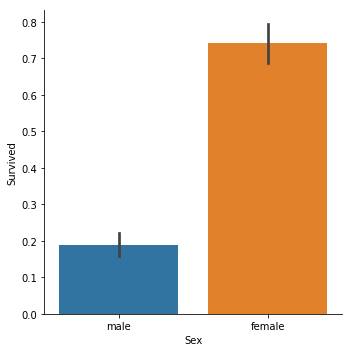

In [23]:
sns.catplot(x="Sex", y="Survived", data=df_train, kind='bar', orient='v')
plt.show()

The plot above shows women aboard the Titanic had a higher survival rate than men.

### 3.2 What was the survival rate of children versus adults?

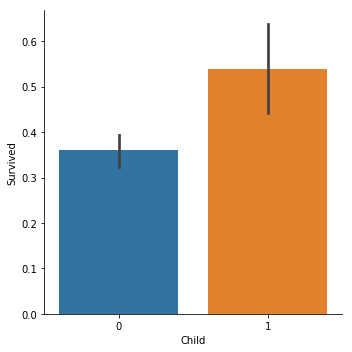

In [25]:
df_train['Child'] = 0
df_train.loc[df_train['Age']<18, 'Child'] = 1

sns.catplot(x="Child", y="Survived", data=df_train, kind='bar', orient='v')
plt.show()

There doesn't appear to be as much of a disparity here as we saw previously with survival rates of men and women.

What would these surival rates look like if we encode sex and the child flag?

### 3.5 What was surival rate of sex encoded with a child flag?

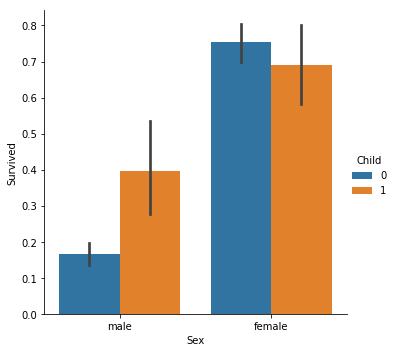

In [26]:
sns.catplot(x="Sex", y="Survived", hue="Child",data=df_train, kind='bar', orient='v')
plt.show()

The plot above shows despite low survival rate among men, male children enjoyed a marginally higher chance of survival. As we already observed in a previous plot, women, in general, had a much higher survival rate.

This plot alone lends credence to the notion that women and children were saved before men. Well, they at least *tried* to save them.

### 3.3 Did passenger socio-economic status play a role in survival?

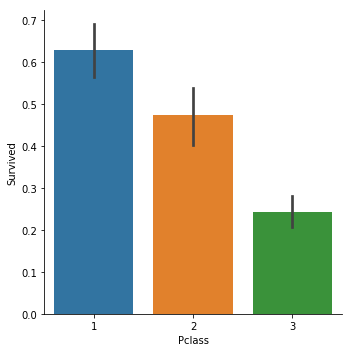

In [27]:
sns.catplot(x="Pclass", y="Survived",data=df_train, kind='bar', orient='v')
plt.show()

This plot shows that the higher the class of the passenger, the greater the likelihood of survival.

### 3.4 How does age affect a passengers survival?
 * What if age is compounded with sex?
 * Or with class?

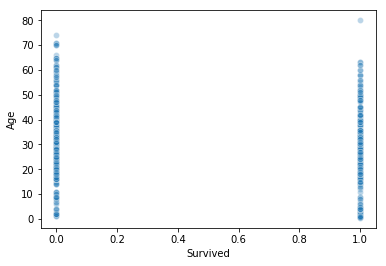

In [28]:
sns.scatterplot(x='Survived', y='Age', data=df_train, alpha=0.3)
plt.show()

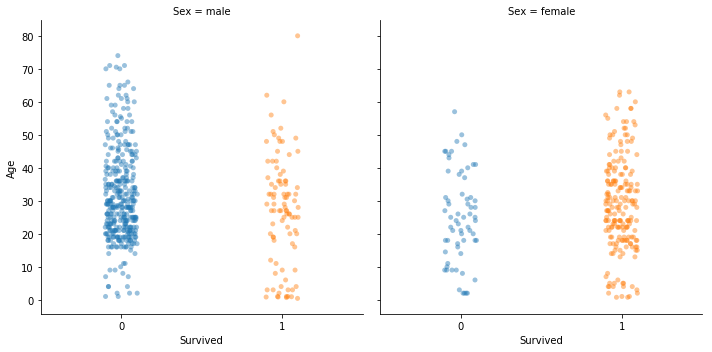

In [29]:
sns.catplot(x='Survived', y='Age', col='Sex', data=df_train, alpha=.45)
plt.show()

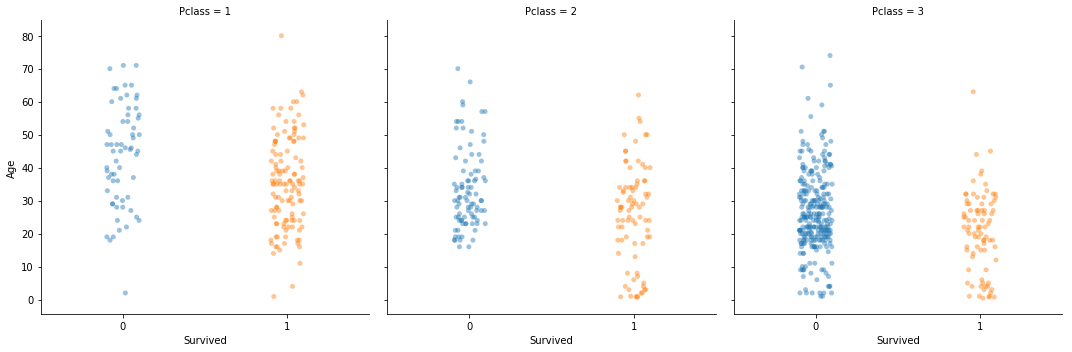

In [30]:
sns.catplot(x='Survived', y='Age', col='Pclass', data=df_train, alpha=.45)
plt.show()

It appears as though there is a high density of younger passengers that didn't survive in 3rd class. Other than that, there doesn't appear to be any meaningful or discernable trends among age and survival.